In [1]:
%matplotlib inline

import copy
from datetime import date
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sys
import time
import torch as pt

sys.path.insert(0, '../..')

from function_space import DenseNet
from problems import ExponentialOnBallNonlinearSinHessian
from solver import EllipticSolver
from utilities import plot_loss_logs_extended, plot_moving_average

%load_ext autoreload
%autoreload 2

device = pt.device('cuda')

## Diffusion loss

In [2]:
d = 20
L = 200000
print_every = 500
delta_t = 0.001
N = 20

problem = ExponentialOnBallNonlinearSinHessian(d=d)

models_diffusion = [EllipticSolver(problem, 'Diffusion, N = 20', seed=42, delta_t=delta_t, N=N, lr=0.001, L=L, K=200, K_test_log=10000,
                 K_boundary=50, alpha=[.01, 1.0], adaptive_forward_process=False, detach_forward=True,
                 print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='diffusion'),
    EllipticSolver(problem, 'Diffusion, N = 20', seed=42, delta_t=delta_t, N=N, lr=0.001, L=L, K=200, K_test_log=10000,
                 K_boundary=50, alpha=[.1, 1.0], adaptive_forward_process=False, detach_forward=True,
                 print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='diffusion'),
         EllipticSolver(problem, 'Diffusion, N = 20', seed=42, delta_t=delta_t, N=N, lr=0.001, L=L, K=200, K_test_log=10000,
                 K_boundary=50, alpha=[1.0, 1.0], adaptive_forward_process=False, detach_forward=True,
                 print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='diffusion')]


In [ ]:
for model in models_diffusion:
    model.train()

../../solver.py:738: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  V_L2[selection] += ((self.V(X[selection]).squeeze() - pt.tensor(self.problem.v_true(X[selection].detach())).float().squeeze())**2).detach().cpu() * self.delta_t_np


0 - loss = 7.2828e+00, v L2 error = 3.3575e-02, n = 19, active: 8/200, 0.53
500 - loss = 2.9149e-02, v L2 error = 2.7855e-04, n = 19, active: 11/200, 0.39
1000 - loss = 4.2554e-03, v L2 error = 1.9106e-04, n = 19, active: 7/200, 0.33
1500 - loss = 4.9997e-03, v L2 error = 2.3368e-04, n = 19, active: 7/200, 0.36
2000 - loss = 4.2244e-03, v L2 error = 2.6970e-04, n = 19, active: 10/200, 0.36
2500 - loss = 2.8900e-03, v L2 error = 2.5433e-04, n = 19, active: 7/200, 0.34
3000 - loss = 2.9607e-03, v L2 error = 3.2030e-04, n = 19, active: 9/200, 0.35
3500 - loss = 3.4844e-03, v L2 error = 3.4709e-04, n = 19, active: 7/200, 0.36
4000 - loss = 2.7360e-03, v L2 error = 2.1461e-04, n = 19, active: 5/200, 0.35
4500 - loss = 2.5799e-03, v L2 error = 2.2055e-04, n = 19, active: 7/200, 0.36
5000 - loss = 2.6741e-03, v L2 error = 2.2487e-04, n = 19, active: 4/200, 0.36
5500 - loss = 2.6091e-03, v L2 error = 2.2264e-04, n = 19, active: 3/200, 0.36
6000 - loss = 4.4979e-03, v L2 error = 3.1739e-04, n =

51500 - loss = 1.2284e-03, v L2 error = 1.0637e-04, n = 19, active: 3/200, 0.36
52000 - loss = 1.5415e-03, v L2 error = 5.7575e-05, n = 19, active: 7/200, 0.36
52500 - loss = 9.9337e-04, v L2 error = 5.2571e-05, n = 19, active: 5/200, 0.36
53000 - loss = 1.4956e-03, v L2 error = 5.9191e-05, n = 19, active: 11/200, 0.36
53500 - loss = 2.0688e-03, v L2 error = 6.5873e-05, n = 19, active: 9/200, 0.36
54000 - loss = 1.3351e-03, v L2 error = 5.6872e-05, n = 19, active: 4/200, 0.36
54500 - loss = 2.0128e-03, v L2 error = 1.2865e-04, n = 19, active: 12/200, 0.36
55000 - loss = 1.5057e-03, v L2 error = 7.4282e-05, n = 19, active: 6/200, 0.36
55500 - loss = 1.5488e-03, v L2 error = 9.0926e-05, n = 19, active: 9/200, 0.36
56000 - loss = 1.6056e-03, v L2 error = 5.7144e-05, n = 19, active: 6/200, 0.36
56500 - loss = 1.2649e-03, v L2 error = 5.0098e-05, n = 19, active: 6/200, 0.36
57000 - loss = 1.8362e-03, v L2 error = 1.2971e-04, n = 19, active: 6/200, 0.36
57500 - loss = 1.5061e-03, v L2 error 

103000 - loss = 1.3610e-03, v L2 error = 5.5504e-05, n = 19, active: 4/200, 0.36
103500 - loss = 1.3795e-03, v L2 error = 5.1742e-05, n = 19, active: 7/200, 0.36
104000 - loss = 1.6380e-03, v L2 error = 4.6176e-05, n = 19, active: 8/200, 0.36
104500 - loss = 1.3329e-03, v L2 error = 2.8774e-05, n = 19, active: 6/200, 0.37
105000 - loss = 1.1645e-03, v L2 error = 3.5839e-05, n = 19, active: 6/200, 0.36
105500 - loss = 1.3957e-03, v L2 error = 3.0777e-05, n = 19, active: 8/200, 0.36
106000 - loss = 1.3787e-03, v L2 error = 3.4557e-05, n = 19, active: 10/200, 0.37
106500 - loss = 1.1257e-03, v L2 error = 5.5276e-05, n = 19, active: 8/200, 0.37
107000 - loss = 1.7374e-03, v L2 error = 3.0899e-05, n = 19, active: 7/200, 0.36
107500 - loss = 1.2278e-03, v L2 error = 3.4473e-05, n = 19, active: 12/200, 0.36
108000 - loss = 1.5135e-03, v L2 error = 5.5026e-05, n = 19, active: 6/200, 0.36
108500 - loss = 1.4279e-03, v L2 error = 4.7342e-05, n = 19, active: 7/200, 0.37
109000 - loss = 1.4811e-03

154000 - loss = 1.4889e-03, v L2 error = 2.8598e-05, n = 19, active: 9/200, 0.37
154500 - loss = 1.1073e-03, v L2 error = 2.3296e-05, n = 19, active: 2/200, 0.37
155000 - loss = 1.5858e-03, v L2 error = 5.3465e-05, n = 19, active: 7/200, 0.37
155500 - loss = 1.6645e-03, v L2 error = 5.3666e-05, n = 19, active: 6/200, 0.37
156000 - loss = 1.2281e-03, v L2 error = 5.3387e-05, n = 19, active: 3/200, 0.37
156500 - loss = 1.5774e-03, v L2 error = 6.3850e-05, n = 19, active: 6/200, 0.36
157000 - loss = 1.8437e-03, v L2 error = 1.9820e-04, n = 19, active: 12/200, 0.37
157500 - loss = 1.0342e-03, v L2 error = 3.6581e-05, n = 19, active: 2/200, 0.37
158000 - loss = 1.0745e-03, v L2 error = 7.1775e-05, n = 19, active: 5/200, 0.37
158500 - loss = 1.2939e-03, v L2 error = 4.5914e-05, n = 19, active: 9/200, 0.37
159000 - loss = 1.3698e-03, v L2 error = 4.0481e-05, n = 19, active: 7/200, 0.37
159500 - loss = 1.5572e-03, v L2 error = 4.4694e-05, n = 19, active: 9/200, 0.37
160000 - loss = 1.7994e-03,

5000 - loss = 1.4293e-02, v L2 error = 1.0275e-04, n = 19, active: 4/200, 0.37
5500 - loss = 1.3135e-02, v L2 error = 9.3411e-05, n = 19, active: 3/200, 0.36
6000 - loss = 2.3430e-02, v L2 error = 1.2952e-04, n = 19, active: 7/200, 0.37
6500 - loss = 1.2744e-02, v L2 error = 1.0348e-04, n = 19, active: 10/200, 0.37
7000 - loss = 1.5418e-02, v L2 error = 8.4457e-05, n = 19, active: 6/200, 0.37
7500 - loss = 1.8455e-02, v L2 error = 1.1198e-04, n = 19, active: 11/200, 0.37
8000 - loss = 1.3111e-02, v L2 error = 6.0952e-05, n = 19, active: 3/200, 0.37
8500 - loss = 1.3097e-02, v L2 error = 7.3521e-05, n = 19, active: 8/200, 0.37
9000 - loss = 9.6825e-03, v L2 error = 4.4037e-05, n = 19, active: 3/200, 0.37
9500 - loss = 1.4666e-02, v L2 error = 4.5536e-05, n = 19, active: 9/200, 0.37
10000 - loss = 1.3237e-02, v L2 error = 4.0994e-05, n = 19, active: 6/200, 0.37
10500 - loss = 1.2947e-02, v L2 error = 6.7050e-05, n = 19, active: 5/200, 0.36
11000 - loss = 1.3875e-02, v L2 error = 4.4269e-

56500 - loss = 1.0446e-02, v L2 error = 4.5032e-05, n = 19, active: 6/200, 0.32
57000 - loss = 1.1742e-02, v L2 error = 1.3675e-04, n = 19, active: 6/200, 0.33
57500 - loss = 9.7744e-03, v L2 error = 4.6869e-05, n = 19, active: 5/200, 0.32
58000 - loss = 1.0579e-02, v L2 error = 6.4744e-05, n = 19, active: 12/200, 0.31
58500 - loss = 1.3592e-02, v L2 error = 4.4117e-05, n = 19, active: 11/200, 0.32
59000 - loss = 9.4688e-03, v L2 error = 3.1611e-05, n = 19, active: 6/200, 0.32
59500 - loss = 1.0633e-02, v L2 error = 4.4436e-05, n = 19, active: 5/200, 0.32
60000 - loss = 1.0756e-02, v L2 error = 3.4075e-05, n = 19, active: 14/200, 0.32
60500 - loss = 8.8529e-03, v L2 error = 8.1896e-05, n = 19, active: 6/200, 0.33
61000 - loss = 1.2333e-02, v L2 error = 3.8159e-05, n = 19, active: 11/200, 0.32
61500 - loss = 8.5986e-03, v L2 error = 6.4331e-05, n = 19, active: 6/200, 0.32
62000 - loss = 1.0701e-02, v L2 error = 6.5083e-05, n = 19, active: 5/200, 0.32
62500 - loss = 1.0611e-02, v L2 erro

../../utilities.py:79: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout(rect=[0, 0.03, 1, 0.93])
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


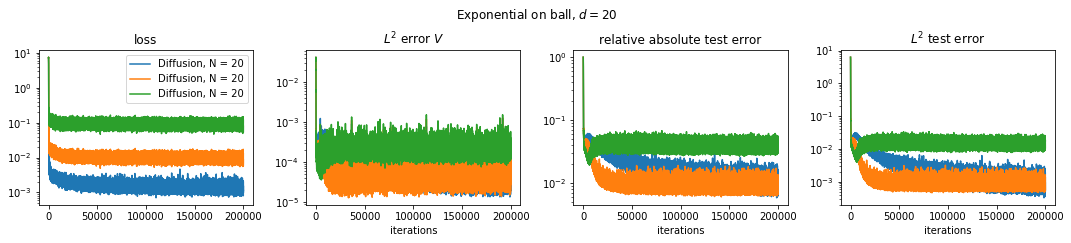

In [8]:
fig = plot_loss_logs_extended('Exponential on ball', models_diffusion)

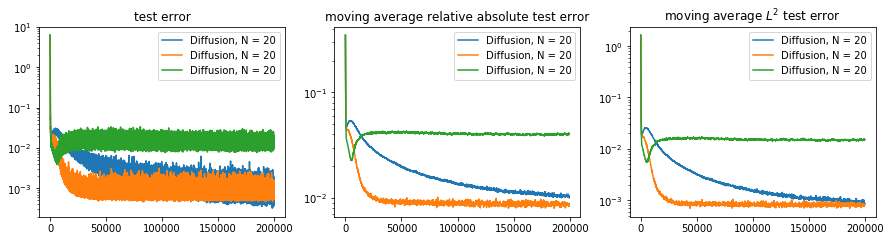

In [9]:
fig = plot_moving_average('Exponential on ball', models_diffusion, moving_span=400)

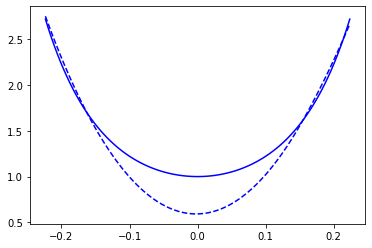

In [15]:
model = models_diffusion[0]

X = pt.cat([pt.linspace(-1 / np.sqrt(d), 1 / np.sqrt(d), 100).unsqueeze(1).repeat(1, d)], 1).to(device)

plt.plot(X[:, 0].detach().cpu().numpy(), problem.v_true(X.detach()).squeeze().cpu().numpy(), color='blue')
plt.plot(X[:, 0].detach().cpu().numpy(), model.V(X).detach().cpu().numpy()[:, 0], '--', color='blue');

## BSDE

In [ ]:
d = 20
L = 40000
print_every = 500
delta_t = 0.001
N = 20000

problem = ExponentialOnBallNonlinearSinHessian(d=d)

models_bsde = [EllipticSolver(problem, 'BSDE', seed=42, delta_t=delta_t, N=N, lr=0.001, L=L, K=200, K_test_log=10000,
                 K_boundary=50, alpha=[1.0, 1.0], adaptive_forward_process=False, detach_forward=True,
                 print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='BSDE')]


In [ ]:
for model in models_bsde:
    model.train()

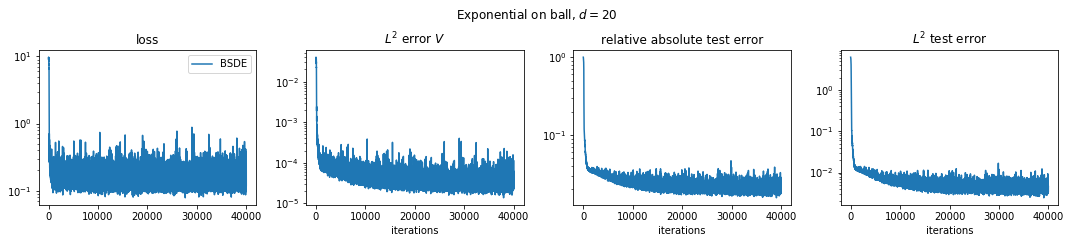

In [16]:
fig = plot_loss_logs_extended('Exponential on ball', models_bsde)

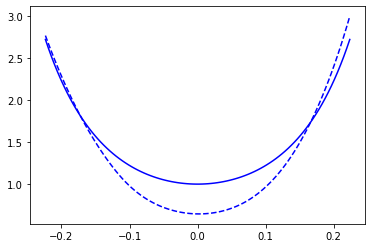

In [18]:
model = models_bsde[0]

X = pt.cat([pt.linspace(-1 / np.sqrt(d), 1 / np.sqrt(d), 100).unsqueeze(1).repeat(1, d)], 1).to(device)

plt.plot(X[:, 0].detach().cpu().numpy(), problem.v_true(X.detach()).squeeze().cpu().numpy(), color='blue')
plt.plot(X[:, 0].detach().cpu().numpy(), model.V(X).detach().cpu().numpy()[:, 0], '--', color='blue');

## PINN

In [ ]:
d = 20
L = 20000
print_every = 500
delta_t = 0.001
N = 20000

problem = ExponentialOnBallNonlinearSinHessian(d=d)

models_pinn_2 = [EllipticSolver(problem, 'PINN', seed=42, delta_t=delta_t, N=N, lr=0.001, L=L, K=200, K_test_log=10000,
                 K_boundary=50, alpha=[.001, 1.0], adaptive_forward_process=False, detach_forward=True, full_hessian=True,
                 print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='PINN'),
                EllipticSolver(problem, 'PINN', seed=42, delta_t=delta_t, N=N, lr=0.001, L=L, K=200, K_test_log=10000,
                 K_boundary=50, alpha=[.01, 1.0], adaptive_forward_process=False, detach_forward=True, full_hessian=True,
                 print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='PINN'),
                EllipticSolver(problem, 'PINN', seed=42, delta_t=delta_t, N=N, lr=0.001, L=L, K=200, K_test_log=10000,
                 K_boundary=50, alpha=[.1, 1.0], adaptive_forward_process=False, detach_forward=True, full_hessian=True,
                 print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='PINN'),
                EllipticSolver(problem, 'PINN', seed=42, delta_t=delta_t, N=N, lr=0.001, L=L, K=200, K_test_log=10000,
                 K_boundary=50, alpha=[1.0, 1.0], adaptive_forward_process=False, detach_forward=True, full_hessian=True,
                 print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='PINN'),
                EllipticSolver(problem, 'PINN', seed=42, delta_t=delta_t, N=N, lr=0.001, L=L, K=200, K_test_log=10000,
                 K_boundary=50, alpha=[10.0, 1.0], adaptive_forward_process=False, detach_forward=True, full_hessian=True,
                 print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='PINN'),
                EllipticSolver(problem, 'PINN', seed=42, delta_t=delta_t, N=N, lr=0.001, L=L, K=200, K_test_log=10000,
                 K_boundary=50, alpha=[.0001, 1.0], adaptive_forward_process=False, detach_forward=True, full_hessian=True,
                 print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='PINN'),
                 EllipticSolver(problem, 'PINN', seed=42, delta_t=delta_t, N=N, lr=0.001, L=L, K=200, K_test_log=10000,
                 K_boundary=50, alpha=[.00001, 1.0], adaptive_forward_process=False, detach_forward=True, full_hessian=True,
                 print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='PINN')
                ]

In [ ]:
for model in models_pinn_2:
    model.train()

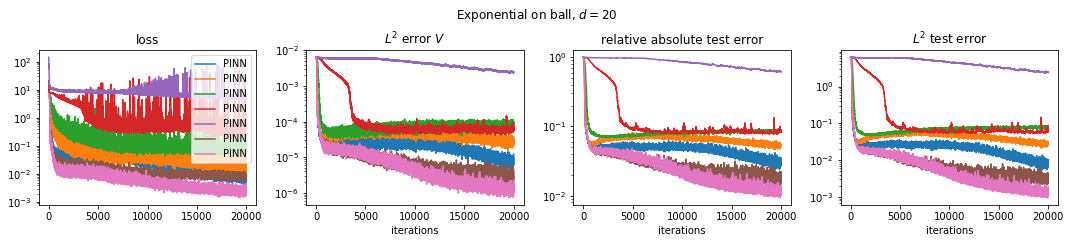

In [19]:
fig = plot_loss_logs_extended('Exponential on ball', models_pinn_2)

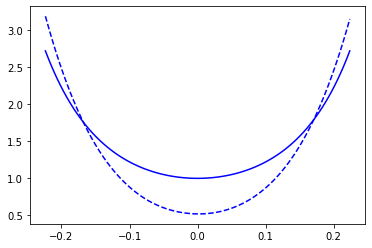

In [21]:
model = models_pinn_2[-1]

X = pt.cat([pt.linspace(-1 / np.sqrt(d), 1 / np.sqrt(d), 100).unsqueeze(1).repeat(1, d)], 1).to(device)

plt.plot(X[:, 0].detach().cpu().numpy(), problem.v_true(X.detach()).squeeze().cpu().numpy(), color='blue')
plt.plot(X[:, 0].detach().cpu().numpy(), model.V(X).detach().cpu().numpy()[:, 0], '--', color='blue');

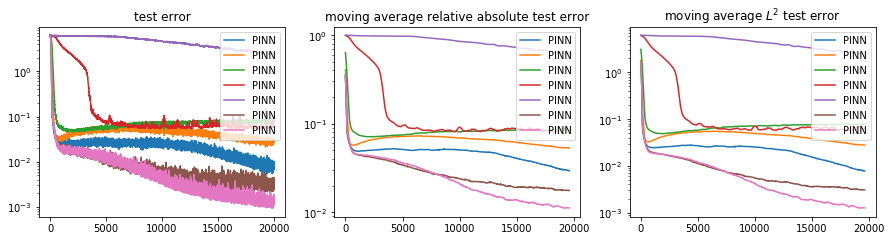

In [22]:
fig = plot_moving_average('Exponential on ball', models_pinn_2, moving_span=400)

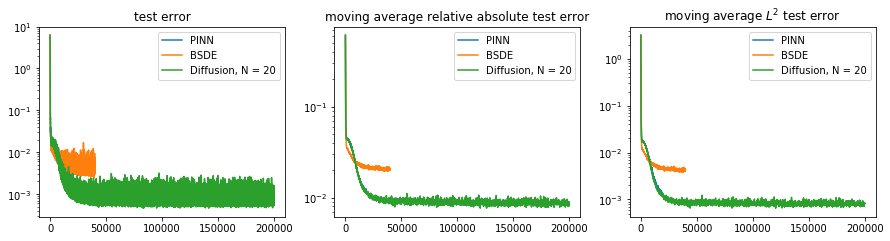

In [23]:
fig = plot_moving_average('Exponential on ball', models_pinn_2[6:7] + models_bsde + models_diffusion[1:2], moving_span=200)

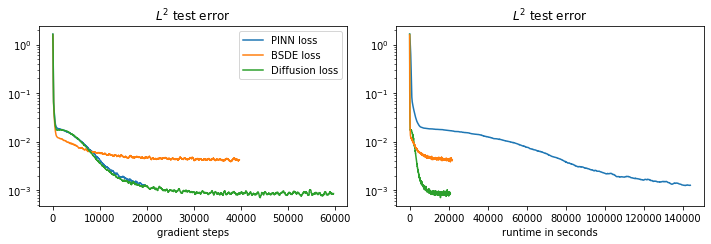

In [24]:
moving_span = 400

COLORS = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:olive', 'tab:pink', 'tab:gray', 'tab:brown', 'tab:cyan']

model_pinn = models_pinn_2[6]
model_bsde = models_bsde[0]
model_diffusion = models_diffusion[1]

fig, ax = plt.subplots(1, 2, figsize=(10, 3.5))

ax[0].plot([np.mean(model_pinn.V_test_L2[i:i + moving_span]) for i in range(len(model_pinn.V_test_L2) - moving_span)], label='PINN loss', color=COLORS[0])
ax[0].plot([np.mean(model_bsde.V_test_L2[i:i + moving_span]) for i in range(len(model_bsde.V_test_L2) - moving_span)], label='BSDE loss', color=COLORS[1])
ax[0].plot([np.mean(model_diffusion.V_test_L2[i:i + moving_span]) for i in range(60000 - moving_span)], label='Diffusion loss', color=COLORS[2])
ax[0].legend()
ax[0].set_yscale('log')
ax[0].set_xlabel('gradient steps')
ax[0].set_title(r'$L^2$ test error')

ax[1].plot(np.cumsum(model_pinn.times)[:-moving_span], [np.mean(model_pinn.V_test_L2[i:i + moving_span]) for i in range(len(model_pinn.V_test_L2) - moving_span)], label='PINN loss')
ax[1].plot(np.cumsum(model_diffusion.times)[:60000 - moving_span], [np.mean(model_diffusion.V_test_L2[i:i + moving_span]) for i in range(60000 - moving_span)], label='Diffusion loss', color=COLORS[2])
ax[1].plot(np.cumsum(model_bsde.times)[:-moving_span], [np.mean(model_bsde.V_test_L2[i:i + moving_span]) for i in range(len(model_bsde.V_test_L2) - moving_span)], label='BSDE loss', color=COLORS[1])
ax[1].set_yscale('log')
ax[1].set_xlabel('runtime in seconds')
ax[1].set_title(r'$L^2$ test error')

fig.tight_layout()

#fig.savefig('img/toy_example_full_hessian_d20.pdf')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


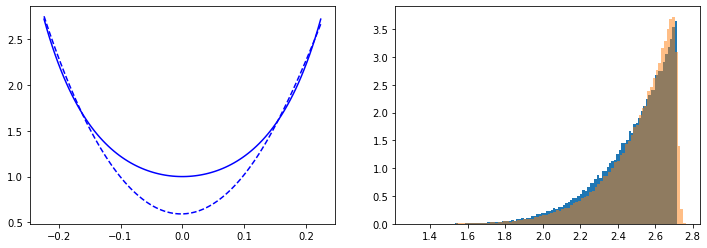

In [29]:
model = models_diffusion[0]
#model = models_pinn_2[-1]
#model = models_bsde[0]

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

X = pt.cat([pt.linspace(-1 / np.sqrt(d), 1 / np.sqrt(d), 100).unsqueeze(1).repeat(1, d)], 1).to(device)

ax[0].plot(X[:, 0].detach().cpu().numpy(), problem.v_true(X.detach()).squeeze().cpu().numpy(), color='blue')
ax[0].plot(X[:, 0].detach().cpu().numpy(), model.V(X).detach().cpu().numpy()[:, 0], '--', color='blue');

K = 100000
X = pt.randn(K, problem.d).to(device)
X = problem.boundary_distance * X / pt.sqrt(pt.sum(X**2, 1)).unsqueeze(1) * (pt.rand(K).unsqueeze(1)**(1 / problem.d)).to(device)
            
ax[1].hist(problem.v_true(X.detach()).cpu().squeeze().numpy(), bins=100, normed=True);
ax[1].hist(model.V(X).detach().cpu().numpy()[:, 0], bins=100, alpha=0.5, normed=True);

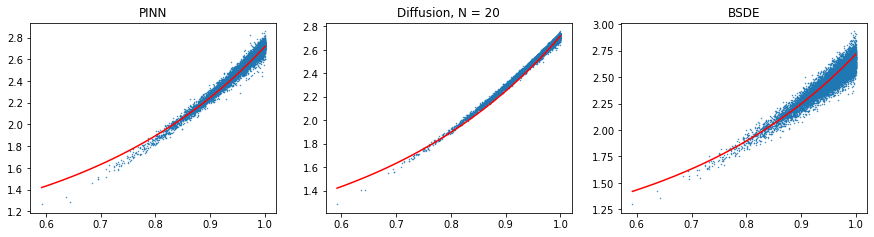

In [26]:
K = 10000
X = pt.randn(K, problem.d).to(device)
X = problem.boundary_distance * X / pt.sqrt(pt.sum(X**2, 1)).unsqueeze(1) * (pt.rand(K).unsqueeze(1)**(1 / problem.d)).to(device)

X_val = pt.linspace(pt.min(pt.sqrt(pt.sum(X**2, 1))), pt.max(pt.sqrt(pt.sum(X**2, 1))), 100)

fig, ax = plt.subplots(1, 3, figsize=(15, 3.5))

for i, model in enumerate(models_pinn_2[6:7] + models_diffusion[0:1] + models_bsde):
    ax[i].set_title(model.name)
    ax[i].plot(X_val.numpy(), problem.v_true(pt.cat([X_val.unsqueeze(1), pt.zeros(100, d-1)], 1).detach()).squeeze().numpy(), color='red');
    ax[i].scatter(pt.sqrt(pt.sum(X**2, 1)).cpu(), model.V(X).detach().cpu().numpy().squeeze(), s=.2);